## Bibliotecas necesarias para cargar los datos producto de la falla  

In [ ]:
import pandas as pd ## Manipulación y creación de DataFrame
import numpy as np ## Manipulación matematica de los datos
import matplotlib.pyplot as plt ## Representación grafica de los datos
from ipywidgets import interact, interactive, fixed, interact_manual ## opcion de señales

Se instala la biblioteca comtrade, para posteriormente invocar la biblioteca

In [ ]:
!pip install comtrade ## Se instala la biblioteca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Se invoca la biblioteca

In [ ]:
from comtrade import Comtrade ## Carga y lectura del formato Comtrade

## Definición de la función para la lectura de los datos

Objetivo: El objetivo de esta función, es a partir de el link y el nombre de la marca realizar la correspondiente carga de la base de datos

***Entradas***: la ruta en donde se encuentra el archivo comtrade, y la marca del dispositivo que registra la falla

***Salidas***: dos Dataframes, donde la primera columna es el tiempo para cada uno, el primero son las señales analogas y el segundo las señales digitales


***Procedimiento***: Se lee el link por medio de la función

```
rec.load(n,encoding = decodificacion)
```
la decodificación de cada marca se obtiene con la función def encoding(marca):

```
def encoding(marca):

      if marca == 'siemens':
                            encoding = "ISO-8859-1"
      elif marca == 'abb':
                          encoding = None
      elif marca == 'ametek':
                          encoding = None           
      elif marca == 'GE Reason':
                          encoding = None
      else:
        print('Syntax error in marca= ')

      return encoding
```
Por medio de la sintaxis, if-elif-else, asignamos la decodificación de cada marca.





Se asigna a la variable time un Dataframe que contiene el tiempo del Comtrade

```
time = pd.DataFrame(rec.time, columns =['t'])
```
Permite la lectura de las señales analogas
```
(rec.analog)
```
Permite la lectura de las señales digitales
```
(rec.digital)

```

Posteriormente se crea el dataframe para cada uno


Se aplica un filtro pasabajas para cada columna de la señal analoga, por medio de el siguiente ciclo for y la función ffiltro_butter()
```
for i in data_analog.columns.values[1:]:
  data_analog[i] = ffiltro_butter(100,1000,i)
```



In [ ]:
def encoding(marca):

      if marca == 'siemens':
                            encoding = "ISO-8859-1"
      elif marca == 'abb':
                          encoding = None
      elif marca == 'ametek':
                          encoding = None
      elif marca == 'GE Reason':
                          encoding = None
      else:
        print('Syntax error in marca= ')

      return encoding

In [ ]:
def ffiltro_butter(fc,fs,vector):
        from scipy import signal
        w=fc/(fs/2)
        b,a=signal.butter(5,w,'low')
        salida=signal.filtfilt(b,a,vector)
        return salida

In [ ]:
def carga(n,marca):
  decodificacion = encoding(marca)
  rec = Comtrade()
  rec.load(n,encoding = decodificacion)
  ## Definición de la columna tiempo
  time = pd.DataFrame(rec.time, columns =['t'])
  ## Creación del Dataframe que contiene señales analogas, concatenado con el tiempo
  data_analog = pd.DataFrame(data = np.transpose(rec.analog),columns = rec.analog_channel_ids )
  data_analog = pd.concat([time,data_analog],axis=1)

  try:
       ## Creación del Dataframe que contiene señales analogas, concatenado con el tiempo
      data_digitales = pd.DataFrame(data = np.transpose(rec.digital),columns = rec.digital_channel_ids)
      data_digitales = pd.concat([time,data_digitales],axis=1)

  except ValueError:
          print('Datos de señales vacíos pasados con nombre especificados.')
          data_digitales = []
          data_digitales = pd.DataFrame(data = data_digitales ,columns = rec.digital_channel_ids)






  ## Filtro butter
  try:
      for i in data_analog.columns.values[1:]:
           data_analog[i] = ffiltro_butter(100,1000,data_analog[i])

  except ValueError:
          for i in data_analoga.columns.values[1:]:
                sha = data_analoga[i].shape
          if len(sha) == 1:
                      data_analoga[i] = ffiltro_butter(100,1000,data_analoga[i])

          else:
                data_analoga[i].iloc[:,0] = ffiltro_butter(100,1000,data_analoga[i].iloc[:,0])


  return data_analog,data_digitales

## Links de prueba

In [ ]:
## Sip4
sie_3 = '/content/drive/MyDrive/Análisis de eventos /Oscilografias_Fabricantes/SIEMENS/Sip4/201030 125050 BL1 NORO-BALS PP2.cfg'
sie_4 = '/content/drive/MyDrive/Análisis de eventos /Oscilografias_Fabricantes/SIEMENS/Sip4/201030 125050 BL2 LMES-LGUA PP2.cfg'

## sip5
sie_5 = '/content/drive/MyDrive/Análisis de eventos /Oscilografias_Fabricantes/SIEMENS/Sip5/211103 213814602 BL1 GVO-SUR PP1.cfg'
sie_6 = '/content/drive/MyDrive/Análisis de eventos /Oscilografias_Fabricantes/SIEMENS/Sip5/211103 213814603 BL1 GVO-REF PP1.cfg'
sie_7 = '/content/drive/MyDrive/Análisis de eventos /Oscilografias_Fabricantes/SIEMENS/Sip5/211103 213814603 BL1 GVO-REF PP2.cfg'
sie_8 = '/content/drive/MyDrive/Análisis de eventos /Oscilografias_Fabricantes/SIEMENS/Sip5/211103 213814603 BL1 GVO-SUR PP2.cfg'

In [ ]:
abb_1 = '/content/drive/MyDrive/Análisis de eventos /Oscilografias_Fabricantes/ABB/20220903 1732_30 SFOD PP1.cfg'
abb_2 = '/content/drive/MyDrive/Análisis de eventos /Oscilografias_Fabricantes/ABB/20220903 1732_30 SFOD PP2.cfg'
abb_3 = '/content/drive/MyDrive/Análisis de eventos /Oscilografias_Fabricantes/ABB/REFD0R10AF032021092436e.cfg'
abb_4 = '/content/drive/MyDrive/Análisis de eventos /Oscilografias_Fabricantes/ABB/REFD0R10AF032021092436e_K1_1_5CB.cfg'
abb_5 = '/content/drive/MyDrive/Análisis de eventos /Oscilografias_Fabricantes/ABB/REFD0R10AF0320210924370.cfg'
abb_6 = '/content/drive/MyDrive/Análisis de eventos /Oscilografias_Fabricantes/ABB/REFD0R10AF0320210924374.cfg'
abb_7 = '/content/drive/MyDrive/Análisis de eventos /Oscilografias_Fabricantes/ABB/REFD0R10AF0320210924376.cfg'

In [ ]:
## Ametek
rdf_1 = '/content/drive/MyDrive/Análisis de eventos /Oscilografias_Fabricantes/RDF/Ametek/ZQ6021.cfg'
rdf_2 = '/content/drive/MyDrive/Análisis de eventos /Oscilografias_Fabricantes/RDF/Ametek/ZQ6022.cfg'
rdf_3 = '/content/drive/MyDrive/Análisis de eventos /Oscilografias_Fabricantes/RDF/Ametek/ZQ6023.cfg'
rdf_4 = '/content/drive/MyDrive/Análisis de eventos /Oscilografias_Fabricantes/RDF/Ametek/ZQ6024.cfg'

## GE Reason RPV311
rdf_5 = '/content/drive/MyDrive/Análisis de eventos /Oscilografias_Fabricantes/RDF/GE Reason RPV311/220903,173229969792,-5,CIRCO,F008,GEB,000001083333,fault.cfg'
rdf_6 = '/content/drive/MyDrive/Análisis de eventos /Oscilografias_Fabricantes/RDF/GE Reason RPV311/220903,173229970378,-5,TUNAL,F018,GEB,000001083333,fault.cfg'

In [ ]:
## link prueba

prueba = '/content/drive/MyDrive/Análisis de eventos /2021FEB/20210209 034216 BL1NOR-PUR PP2.cfg'

## Función final


La sintaxis correcta para cada carga es:

```
'siemens'
'abb'
'ametek'
'GE Reason'
```



In [ ]:
data_analoga, data_digitla = carga(prueba ,'siemens')

/usr/local/lib/python3.9/dist-packages/comtrade.py:397: Warning: Unknown standard revision "1997"
  warnings.warn(Warning(msg))
/usr/local/lib/python3.9/dist-packages/comtrade.py:712: FutureWarning: digital is deprecated, use status instead.
  warnings.warn(FutureWarning("digital is deprecated, use status instead."))
/usr/local/lib/python3.9/dist-packages/comtrade.py:705: FutureWarning: digital_channel_ids is deprecated, use status_channel_ids instead.
  warnings.warn(FutureWarning("digital_channel_ids is deprecated, use status_channel_ids instead."))


## Función apertura y cierre

Se identifican las señales digitales que cambian su estado, al menos una vez en el tiempo.

las variables max y min, obtiene las señales que tienen como maximo valor el numero 1 y como minimo el valor de 0, posteriormente la variable column_names compara los valores que cumplen con las dos condiciones (que tengan valor maximo de 1 y minimo de 0), en otras palabras que cambie su estado booleano en algun momento del tiempo

la Función:

```
def grafica_digital(names_binary_signal,binary_signal:
```
Se define con el fin de graficar el caso de que solo sea un señal la que cambia su estado binario, puesto que al usar un ciclo for, en la función grafica_digitales() al obtener solo una señal que cambia en el tiempo, se producira un error puesto que ax[] no recibe como parametro el numero 0


La función grafica digital, cumple con la misma función del ciclo for explicado mas adelante en la función *grafica_digitales()*, con la diferencia que para este no se necesita el ciclo for, puesto que será para una sola señal, el motivo de esta función es solucionar un inconveniente producido al aplicar la función subplot, puesto que es necesario mas de una señal

In [ ]:
def grafica_digital(names_binary_signal,binary_signal):

    fig, ax = plt.subplots(1)
    fig.set_size_inches(30,3)
    plt.subplots_adjust(wspace=0.5, hspace=1)

    ax.fill_between(binary_signal.t, y1=0, y2=1, facecolor = 'royalblue', label = 'off')
    ax.fill_between(binary_signal.t, where = ((binary_signal[names_binary_signal[0]].values)== 1), y1=0, y2=1, facecolor = 'red' , label = 'on')
    ax.set_title(names_binary_signal)
    ax.set_xlabel('time')
    ax.set_yticks([])
    ax.set_xticks(np.linspace(binary_signal.t.min(), binary_signal.t.max(), 10, endpoint=True))
    ax.set_xlim(binary_signal.t.min(), binary_signal.t.max())


Objetivo: La función uno(), tiene como objetivo obtener el instante exacto de tiempo donde la función digital, cambia su estado logico, y el instante de tiempo donde vuelve a su estado logico inicial

In [ ]:
def uno(x,binary_signal):
    first_time = np.amin(list(np.where(binary_signal[x]==True)))
    last_time = np.amax(list(np.where(binary_signal[x]==True)))
    return first_time, last_time

objetivo: la función calculo_tiempos_de_respuesta(), genera la interfase, para selecionar señales a comparar, por medio de la función @interact, se realiza la resta en la función f() con los valores de inicio generados de la función uno(), para luego imprimir el resultado

In [ ]:
def calculo_tiempos_de_respuesta(columns_names,bimary_signal):

  print('Tiempo de respuesta apertura entre las señales: ')

  @interact(señal = columns_names , señal_2 = columns_names )


  def f(señal, señal_2):
      tiempo_de_respuesta = bimary_signal.t.iloc[uno(señal,bimary_signal)[0]] - bimary_signal.t.iloc[uno(señal_2,bimary_signal)[0]]
      tiempo_de_respuesta = abs(tiempo_de_respuesta)
      print('Tiempo de respuesta apertura entre las señales ',señal,' y ',señal_2, 'es:' , tiempo_de_respuesta,'s')




objetivo: la función calculo_tiempos_de_respuesta(), genera la interfase, para selecionar señales a comparar, por medio de la función @interact, se realiza la resta en la función f() con los valores de fin generados de la función uno(), para luego imprimir el resultado

In [ ]:
def calculo_tiempos_de_respuesta_cierre(columns_names,bimary_signal):

  print('Tiempo de respuesta cierre entre las señales: ')

  @interact(señal = columns_names , señal_2 = columns_names )


  def f(señal, señal_2):
      tiempo_de_respuesta = bimary_signal.t.iloc[uno(señal,bimary_signal)[1]] - bimary_signal.t.iloc[uno(señal_2,bimary_signal)[1]]
      tiempo_de_respuesta = abs(tiempo_de_respuesta)
      print('Tiempo de respuesta cierre entre las señales ',señal,' y ',señal_2, 'es:' , tiempo_de_respuesta,'s')



objetivo: La función grafica_digitales tiene la función de graficar y permitir la interfase, de comparación apertura y cierre, entre señales.

Procedimiento: inicia con un criterio if-esle, puesto que existen dos casos diferentes, el primero es que el tamaño de las señales que cambian de estado binario sea uno, y el segundo que sean varios.

Para el primer caso no es necesario el ciclo for, ni la función plt.subplot() , puesto que es uno, se envia a la función grafica_digital()

Para el segundo caso se utiliza la función subplot,con el fin de generar el numero exacto de graficas que de señales digitales para cada caso, luego se recorre un ciclo for, del tamaño del numero de señales.

las lineas de codigo de la grafica son las siguientes



```
              ax[i].fill_between(binary_signal.t, y1=0, y2=1, facecolor = 'royalblue', label = 'off') ## llena la grafica de acuerdo a un criterio, en este caso 0 de color azul
              ax[i].fill_between(binary_signal.t, where = (binary_signal[names_binary_signal[i]]== 1), y1=0, y2=1, facecolor = 'red' , label = 'on') ## llena la grafica de acuerdo a un criterio, en este caso 1 de color rojo
              ax[i].set_title(names_binary_signal[i]) ## titulo
              ax[i].set_xlabel('time') ## nombre eje x
              ax[i].set_yticks([]) ## ajuste del eje y
              ax[i].set_xticks(np.linspace(binary_signal.t.min(), binary_signal.t.max(), 10, endpoint=True)) ## delimitación y aajuste del eje x
              ax[i].set_xlim(binary_signal.t.min(), binary_signal.t.max())delimitación del eje x
```

Finalmente, se genera por medio de la función *calculo_tiempos_de_respuesta* y *calculo_tiempos_de_respuesta_cierre*, las dos interfases que nos permiten conocer las diferencias de tiempo entre dos señales, tanto en la apertura como en el cierre

In [ ]:
def grafica_digitales(names_binary_signal,binary_signal):

    import matplotlib.pyplot as plt

    if len(names_binary_signal) == 1 :
        grafica_digital(names_binary_signal,binary_signal)
    else:
          fig, ax = plt.subplots(len(names_binary_signal),1)
          fig.set_size_inches(20,len(names_binary_signal)*3)
          for i in range(len(names_binary_signal)):
              plt.subplots_adjust(wspace=0.5, hspace=1)
              ax[i].fill_between(binary_signal.t, y1=0, y2=1, facecolor = 'royalblue', label = 'off')
              ax[i].fill_between(binary_signal.t, where = (binary_signal[names_binary_signal[i]]== 1), y1=0, y2=1, facecolor = 'red' , label = 'on')
              ax[i].set_title(names_binary_signal[i])
              ax[i].set_xlabel('time')
              ax[i].set_yticks([])
              ax[i].set_xticks(np.linspace(binary_signal.t.min(), binary_signal.t.max(), 10, endpoint=True))
              ax[i].set_xlim(binary_signal.t.min(), binary_signal.t.max())

          calculo_tiempos_de_respuesta(names_binary_signal,binary_signal)
          calculo_tiempos_de_respuesta_cierre(names_binary_signal,binary_signal)




se verifica que exista data correspondiente a señales digitales, por tanto se hace un if-else: general, si el dataframe de data no tiene señales imprime *print('Datos de señales vacíos pasados con nombre especificados.')*, en el caso contrario procede lo explicado a continuación



la función "apertura_y_cierre" tiene la función de identificar las señales que cambian de estado digital en el tiempo.



```
# max = np.where(pd.Series(bimary_signal.max())== 1)[0]
```
En la variable max se guardan las señales que tienen como valor maxino el numero uno


```
min = np.where(pd.Series(bimary_signal.min())== 0)[0]
```
en la variable min se guardan las señales que tienen como numero menor el numero 0

*LOGICA APLICADA*

la variable columns_names utiliza el operador logico AND, aplicando el siguiente criterio, solo guarda las señales que tengan como minimo 0 y maximo uno, esto quiere decir que son señales que cambian su estado logico, algun momento del tiempo.

*PROCEDIMIENTO POSTERIOR*

Si la variable columns_names no ha guardado ninguna variable, se imprime "No hay señales digitales que cambien su estado logico", en el caso contrario, se aplica la función grafica_digitales(), que recibe como entradas, el nombre de las columnas con cambio en su estado logico y la data completa de señales digitales

In [ ]:
def apertura_y_cierre(bimary_signal):
    if len(bimary_signal) != 0:
      max = np.where(pd.Series(bimary_signal.max())== 1)[0]
      min = np.where(pd.Series(bimary_signal.min())== 0)[0]
      columns_names = bimary_signal.columns.values[list(set(max) & set(min))]


      if len(columns_names) == 0 :
        print('No hay señales digitales que cambien su estado logico')
      else:
          grafica_digitales(columns_names,bimary_signal)
    else:
      print('Datos de señales vacíos pasados con nombre especificados.')

## Función tiempo de respuesta apertura y cierre

## Función final apertura y cierre

links que no sirven: abb_4 b (No hay data de entrada)


Tiempo de respuesta apertura entre las señales: 


interactive(children=(Dropdown(description='señal', options=('>85-21 Rec.Ch1', '85-21 SEND', '21 Pickup ØA', '…

Tiempo de respuesta cierre entre las señales: 


interactive(children=(Dropdown(description='señal', options=('>85-21 Rec.Ch1', '85-21 SEND', '21 Pickup ØA', '…

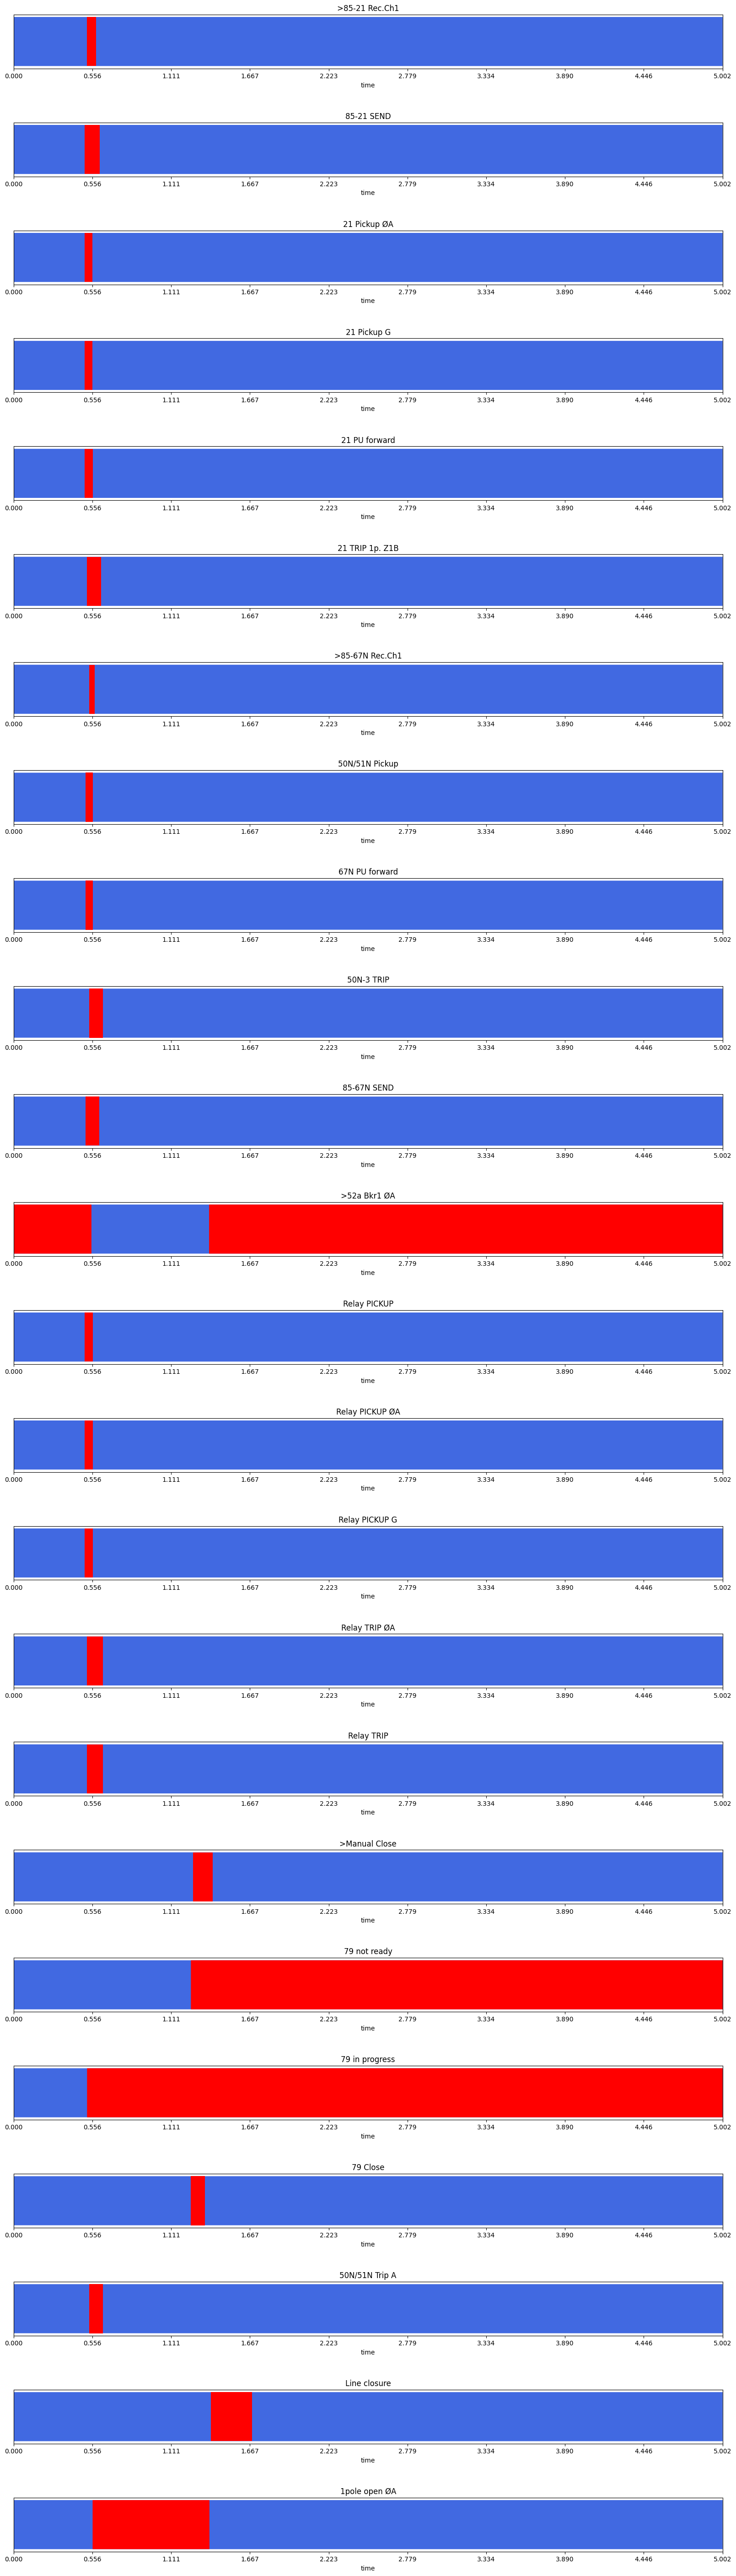

In [ ]:
apertura_y_cierre(data_digitla)